In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)


In [3]:
ball_positions

[{},
 {},
 {},
 {},
 {},
 {},
 {1: [821.7333984375, 687.1531982421875, 837.779296875, 704.1259765625]},
 {1: [813.3262939453125,
   694.1712036132812,
   831.468017578125,
   715.04052734375]},
 {1: [797.3018188476562,
   718.7646484375,
   813.9708251953125,
   737.7110595703125]},
 {},
 {1: [769.3458251953125, 759.431640625, 788.0592041015625, 778.848876953125]},
 {1: [777.5443725585938,
   717.6407470703125,
   796.56591796875,
   738.517333984375]},
 {1: [787.8770141601562,
   669.9556884765625,
   807.1327514648438,
   691.895263671875]},
 {1: [795.963134765625,
   646.8468627929688,
   812.9022216796875,
   665.8941040039062]},
 {},
 {1: [814.9260864257812,
   569.4879150390625,
   831.3132934570312,
   586.765869140625]},
 {1: [818.2470703125, 550.712890625, 836.1181640625, 570.3272705078125]},
 {1: [826.6671752929688,
   522.112548828125,
   842.8987426757812,
   537.91650390625]},
 {},
 {},
 {},
 {},
 {},
 {1: [864.527099609375,
   402.00921630859375,
   878.2149658203125,
   

In [4]:
ball_positions = [x.get(1,[]) for x in ball_positions]
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])
df_ball_positions


,x1,y1,x2,y2
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
209,1184.411377,248.623962,1199.053467,265.774902
210,1183.798462,233.345078,1196.418457,245.940079
211,1182.623657,225.496399,1196.798828,241.858978
212,1179.965332,213.547348,1194.773438,228.974350


In [5]:
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()
df_ball_positions


,x1,y1,x2,y2
0,821.733398,687.153198,837.779297,704.125977
1,821.733398,687.153198,837.779297,704.125977
2,821.733398,687.153198,837.779297,704.125977
3,821.733398,687.153198,837.779297,704.125977
4,821.733398,687.153198,837.779297,704.125977
...,...,...,...,...
209,1184.411377,248.623962,1199.053467,265.774902
210,1183.798462,233.345078,1196.418457,245.940079
211,1182.623657,225.496399,1196.798828,241.858978
212,1179.965332,213.547348,1194.773438,228.974350


In [6]:
df_ball_positions["mid_y"] = (df_ball_positions["y1"] + df_ball_positions["y2"])/2
df_ball_positions

,x1,y1,x2,y2,mid_y
0,821.733398,687.153198,837.779297,704.125977,695.639587
1,821.733398,687.153198,837.779297,704.125977,695.639587
2,821.733398,687.153198,837.779297,704.125977,695.639587
3,821.733398,687.153198,837.779297,704.125977,695.639587
4,821.733398,687.153198,837.779297,704.125977,695.639587
...,...,...,...,...,...
209,1184.411377,248.623962,1199.053467,265.774902,257.199432
210,1183.798462,233.345078,1196.418457,245.940079,239.642578
211,1182.623657,225.496399,1196.798828,241.858978,233.677689
212,1179.965332,213.547348,1194.773438,228.974350,221.260849


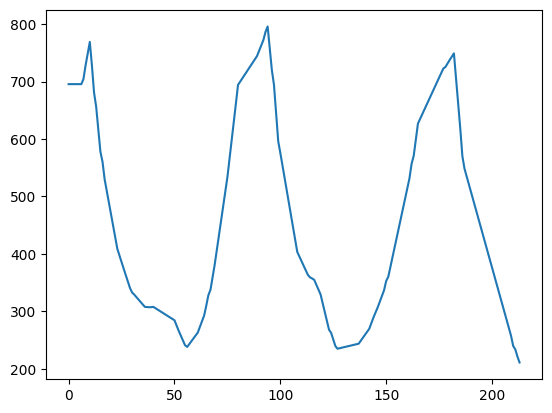

In [7]:
plt.plot(df_ball_positions["mid_y"])

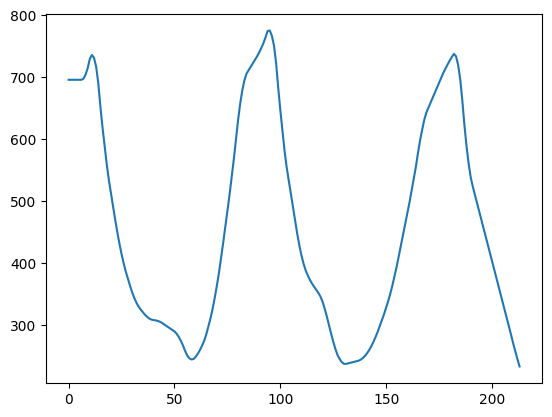

In [8]:
df_ball_positions["mid_y_rolling_mean"] = df_ball_positions["mid_y"].rolling(window=5, min_periods=1, center=False).mean()
plt.plot(df_ball_positions["mid_y_rolling_mean"])

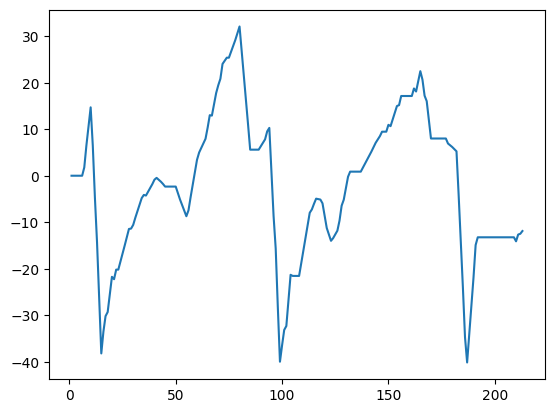

In [9]:
df_ball_positions["delta_mid_y"] = df_ball_positions['mid_y_rolling_mean'].diff()
plt.plot(df_ball_positions["delta_mid_y"])

In [10]:
df_ball_positions.head()

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_mid_y
0,821.733398,687.153198,837.779297,704.125977,695.639587,695.639587,NaN
1,821.733398,687.153198,837.779297,704.125977,695.639587,695.639587,0.0
2,821.733398,687.153198,837.779297,704.125977,695.639587,695.639587,0.0
3,821.733398,687.153198,837.779297,704.125977,695.639587,695.639587,0.0
4,821.733398,687.153198,837.779297,704.125977,695.639587,695.639587,0.0


In [11]:
df_ball_positions['ball_hit']=0

In [12]:
minium_change_frame = 25

for i in range(1,len(df_ball_positions)-int(minium_change_frame * 1.2)):

    neg_change = df_ball_positions['delta_mid_y'].iloc[i] >0 and df_ball_positions['delta_mid_y'].iloc[i+1] <0 
    pos_change = df_ball_positions["delta_mid_y"].iloc[i]<0 and df_ball_positions["delta_mid_y"].iloc[i+1]>0

    if neg_change or pos_change:
       change_count = 0 

       for frame_change in range(i+1, i+int(minium_change_frame*1.2)+1):
            neg_position_change_following_frame = df_ball_positions['delta_mid_y'].iloc[i] >0 and df_ball_positions['delta_mid_y'].iloc[frame_change] <0
            pos_position_change_following_frame = df_ball_positions['delta_mid_y'].iloc[i] >0 and df_ball_positions['delta_mid_y'].iloc[frame_change] <0

            if neg_position_change_following_frame or neg_change:
                change_count +=1
            elif pos_position_change_following_frame or pos_change:
                change_count +=1

       if change_count > minium_change_frame-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

C:\Users\ahmed\AppData\Local\Temp\ipykernel_21788\1044972391.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\ahmed\AppData\Local\Temp\ipykernel_21788\1044972391.py:21: SettingWithCopyWa

In [14]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()
frame_nums_with_ball_hits

[11, 58, 95, 131, 182]